In [4]:
pip install xlrd

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path


%matplotlib inline

In [5]:
gas_path = Path('gas_clean.csv')

gas_prices = pd.read_csv(gas_path)#, index_col = 'Date', parse_dates = True, infer_datetime_format=True, delimiter = ',')

In [6]:
gas_prices.columns = ['Date', 'US', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'DC', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming']  

In [7]:
gas_prices = gas_prices.dropna()

In [8]:
gas_prices.head(10)

,Date,US,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming
192,Jan-89,4.81,5.13,2.65,4.59,4.16,5.28,3.95,6.31,5.33,...,4.19,4.46,4.25,4.03,4.34,5.17,4.67,4.83,4.59,4.31
193,Feb-89,4.80,5.08,2.74,4.81,4.13,5.25,3.95,6.29,5.27,...,3.94,4.51,4.30,4.03,4.88,5.23,4.74,4.82,4.64,4.31
194,Mar-89,4.79,4.93,2.68,4.75,4.22,5.27,3.96,6.04,5.33,...,3.87,4.35,4.12,4.13,4.70,5.04,4.51,4.88,4.50,4.30
195,Apr-89,4.77,5.00,2.69,4.82,4.59,5.16,4.02,6.15,5.43,...,3.89,4.41,3.93,4.30,4.73,4.81,4.70,5.04,4.46,4.31
196,May-89,4.64,5.11,2.61,4.99,4.71,4.28,4.09,5.54,5.50,...,3.96,4.20,3.96,4.17,4.99,4.92,4.83,5.32,4.23,4.35
197,Jun-89,4.57,5.27,2.63,4.77,4.45,4.07,4.19,5.61,5.61,...,4.05,4.47,3.97,4.00,5.13,4.34,4.91,6.11,4.40,4.31
198,Jul-89,4.65,5.39,2.59,4.77,4.98,4.63,4.32,5.26,5.65,...,4.10,4.51,3.74,4.13,5.01,4.52,4.77,6.41,4.54,4.40
199,Aug-89,4.61,5.33,2.27,5.03,4.99,4.57,4.36,4.98,5.46,...,4.15,4.54,3.80,4.23,4.92,4.59,4.66,6.22,4.74,4.45
200,Sep-89,4.67,5.36,2.30,4.74,4.92,4.39,4.31,5.34,5.48,...,3.99,4.50,4.15,4.30,4.71,4.18,5.67,6.21,4.54,4.45
201,Oct-89,4.61,5.25,2.38,4.85,4.78,4.35,4.19,5.88,5.56,...,3.80,4.50,4.09,4.54,4.49,4.67,4.45,5.46,4.16,4.36


In [9]:
def convert_to_date(input_str): 
    input_ary=input_str.split('-')
    return (input_ary[1], input_ary[0], 1)

In [10]:
convert_to_date('Oct-89')

('89', 'Oct', 1)

In [11]:
#gas_prices['Date'].map(convert_to_date)
#assumes it's actually
#gas_prices['Date'].map(lambda x: convert_to_date(x))

#gas_prices['Date'].map(lambda x: x.split('-')).map(lambda x: (x[1], x[0], 1))


In [11]:
# pd.to_datetime(gas_prices['Date'].map(lambda x: x.split('-')).map(lambda x: dt.datetime(int(x[1]), int(x[0]), 1)))
# gas_prices['Date'].map(lambda x: dt.datetime.strpdate(x, 'M-Y'))
gas_prices['Date']=pd.to_datetime(gas_prices['Date'], format='%b-%y')
gas_prices=gas_prices.set_index('Date')
gas_prices.head()

,US,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DC,...,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1989-01-01,4.81,5.13,2.65,4.59,4.16,5.28,3.95,6.31,5.33,5.55,...,4.19,4.46,4.25,4.03,4.34,5.17,4.67,4.83,4.59,4.31
1989-02-01,4.80,5.08,2.74,4.81,4.13,5.25,3.95,6.29,5.27,5.47,...,3.94,4.51,4.30,4.03,4.88,5.23,4.74,4.82,4.64,4.31
1989-03-01,4.79,4.93,2.68,4.75,4.22,5.27,3.96,6.04,5.33,5.74,...,3.87,4.35,4.12,4.13,4.70,5.04,4.51,4.88,4.50,4.30
1989-04-01,4.77,5.00,2.69,4.82,4.59,5.16,4.02,6.15,5.43,5.11,...,3.89,4.41,3.93,4.30,4.73,4.81,4.70,5.04,4.46,4.31
1989-05-01,4.64,5.11,2.61,4.99,4.71,4.28,4.09,5.54,5.50,4.95,...,3.96,4.20,3.96,4.17,4.99,4.92,4.83,5.32,4.23,4.35


In [12]:
describe = gas_prices[['Alabama']].describe()

describe

,Alabama
count,357.000000
mean,10.372493
std,3.456427
min,4.930000
25%,6.820000
50%,11.250000
75%,12.780000
max,18.570000


In [13]:
import datetime as dt
consumption = pd.read_excel(r'consumption.xlsx')#, index_col = "Date", parse_dates = True, )

consumption.dropna(inplace = True)

consumption.head(10)

consumption['Date']=pd.to_datetime(consumption['Date']).map(lambda x: dt.datetime(x.year, x.month, 1))
consumption=consumption.set_index('Date')
consumption.head()

,U.S. Natural Gas Total Consumption (MMcf),U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
Date,,,,,,,,,
2001-01-01,2676998.0,95602.0,76386.0,2505011.0,976677,500267,686540.0,1235.0,340292.0
2001-02-01,2309464.0,86821.0,65770.0,2156873.0,780482,422407,640026.0,1115.0,312843.0
2001-03-01,2246633.0,96438.0,63626.0,2086568.0,681884,375688,664918.0,1235.0,362843.0
2001-04-01,1807170.0,92602.0,50736.0,1663832.0,400728,255361,622054.0,1195.0,384494.0
2001-05-01,1522382.0,94981.0,42238.0,1385163.0,209327,164146,576532.0,1235.0,433923.0


In [14]:
combined = pd.merge(gas_prices,consumption, left_index = True, right_index = True)

In [15]:
combined.head(10)

,US,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DC,...,Wyoming,U.S. Natural Gas Total Consumption (MMcf),U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,9.50,9.44,3.10,7.20,8.71,12.35,6.94,10.13,8.36,13.64,...,6.93,2676998.0,95602.0,76386.0,2505011.0,976677,500267,686540.0,1235.0,340292.0
2001-02-01,9.80,11.03,3.11,8.10,8.94,14.26,8.23,9.82,12.02,13.55,...,7.97,2309464.0,86821.0,65770.0,2156873.0,780482,422407,640026.0,1115.0,312843.0
2001-03-01,9.14,10.87,3.10,7.30,8.34,14.20,8.47,8.44,8.55,12.17,...,9.96,2246633.0,96438.0,63626.0,2086568.0,681884,375688,664918.0,1235.0,362843.0
2001-04-01,9.01,10.65,2.90,7.26,7.98,11.58,8.99,7.81,10.85,12.43,...,11.67,1807170.0,92602.0,50736.0,1663832.0,400728,255361,622054.0,1195.0,384494.0
2001-05-01,9.19,11.19,2.98,7.82,8.36,10.78,9.28,6.11,11.62,11.94,...,11.04,1522382.0,94981.0,42238.0,1385163.0,209327,164146,576532.0,1235.0,433923.0
2001-06-01,8.50,11.37,2.94,7.73,7.62,9.65,9.42,5.38,11.43,10.78,...,8.63,1444378.0,91218.0,40041.0,1313119.0,146837,135449,536820.0,1195.0,492819.0
2001-07-01,7.90,11.28,3.14,7.93,7.76,7.32,9.57,6.90,11.82,10.64,...,9.51,1598071.0,93635.0,44518.0,1459919.0,123777,130415,570067.0,1235.0,634425.0
2001-08-01,7.61,11.22,3.03,7.99,6.80,6.69,9.79,7.01,12.09,10.15,...,8.94,1669178.0,94087.0,46609.0,1528483.0,116934,133687,589875.0,1235.0,686753.0
2001-09-01,6.96,11.00,3.20,7.94,6.49,5.56,9.70,4.39,11.48,9.79,...,8.81,1494128.0,91760.0,41497.0,1360871.0,127482,143342,578590.0,1195.0,510262.0


In [16]:
natl_prices = pd.read_excel(r'national_prices.xlsx')#, index_col = "Date", parse_dates = True, )

natl_prices.dropna(inplace = True)

natl_prices.head(10)

natl_prices['Date']=pd.to_datetime(natl_prices['Date']).map(lambda x: dt.datetime(x.year, x.month, 1))
natl_prices=natl_prices.set_index('Date')
natl_prices.head()

,U.S. Natural Gas Wellhead Price,Price of U.S. Natural Gas Imports,U.S. Natural Gas Pipeline Imports Price,Price of U.S. Natural Gas LNG Imports,Price of U.S. Natural Gas Exports,Price of U.S. Natural Gas Pipeline Exports,Price of Liquefied U.S. Natural Gas Exports,U.S. Natural Gas Citygate Price,U.S. Price of Natural Gas Delivered to Residential Consumers,U.S. Price of Natural Gas Sold to Commercial Consumers,United States Natural Gas Industrial Price,U.S. Natural Gas Electric Power Price
Date,,,,,,,,,,,,
2002-01-01,2.50,2.73,2.71,3.70,2.90,2.63,4.27,3.79,7.38,6.51,4.05,3.10
2002-02-01,2.19,2.32,2.30,2.97,2.42,2.19,4.04,3.76,7.23,6.40,3.70,2.86
2002-03-01,2.40,2.61,2.61,2.65,2.75,2.58,3.74,3.84,7.10,6.28,3.78,3.37
2002-04-01,2.94,3.27,3.28,3.07,3.51,3.47,3.68,4.21,7.66,6.56,3.64,3.80
2002-05-01,2.94,3.25,3.25,3.33,3.32,3.29,3.79,4.07,8.54,6.68,4.07,3.78


In [17]:
production = pd.read_excel(r'production.xls')#, index_col = "Date", parse_dates = True, )

production.dropna(inplace = True)

production.head(10)

production['Date']=pd.to_datetime(production['Date']).map(lambda x: dt.datetime(x.year, x.month, 1))
production = production.set_index('Date')
production.head()

,U.S. Natural Gas Gross Withdrawals (MMcf),U.S. Natural Gas Gross Withdrawals from Gas Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Oil Wells (MMcf),U.S. Natural Gas Gross Withdrawals from Shale Gas (MMcf),U.S. Natural Gas Gross Withdrawals from Coalbed Wells (MMcf),U.S. Natural Gas Repressuring (MMcf),U.S. Nonhydrocarbon Gases Removed from Natural Gas (MMcf),U.S. Natural Gas Vented and Flared (MMcf),U.S. Natural Gas Marketed Production (MMcf),U.S. Natural Gas Plant Liquids Production (MMcf),U.S. Dry Natural Gas Production (MMcf)
Date,,,,,,,,,,,
2007-01-01,2042882.0,1208647.0,495368.0,169026.0,169842.0,323929.0,55318.0,11165.0,1652470,76119,1576351.0
2007-02-01,1878003.0,1109144.0,462784.0,152669.0,153405.0,305232.0,48838.0,10473.0,1513461,69716,1443745.0
2007-03-01,2094555.0,1256526.0,499160.0,169026.0,169842.0,323291.0,55329.0,12849.0,1703085,78451,1624634.0
2007-04-01,1994942.0,1197836.0,469170.0,163574.0,164363.0,302337.0,53009.0,12923.0,1626673,74931,1551743.0
2007-05-01,2066642.0,1273889.0,453886.0,169026.0,169842.0,280878.0,51144.0,12070.0,1722549,79347,1643202.0


In [18]:
storage = pd.read_excel(r'storage.xlsx')#, index_col = "Date", parse_dates = True, )

storage.dropna(inplace = True)

storage.head(10)

storage['Date']=pd.to_datetime(storage['Date']).map(lambda x: dt.datetime(x.year, x.month, 1))
storage = storage.set_index('Date')
storage.head()

,U.S. Total Natural Gas Underground Storage Capacity (MMcf),U.S. Natural Gas Underground Storage Volume (MMcf),U.S. Total Natural Gas in Underground Storage (Base Gas) (MMcf),U.S. Total Natural Gas in Underground Storage (Working Gas) (MMcf),U.S. Total Natural Gas Injections into Underground Storage (MMcf),U.S. Natural Gas Underground Storage Withdrawals (MMcf),U.S. Natural Gas Underground Storage Net Withdrawals (MMcf)
Date,,,,,,,
1989-01-01,8119368.0,6307000.0,3798000.0,2509000.0,53000.0,418000.0,365000.0
1989-02-01,8119368.0,5795000.0,3801000.0,1994000.0,32000.0,602000.0,570000.0
1989-03-01,8119368.0,5577000.0,3801000.0,1776000.0,106000.0,362000.0,256000.0
1989-04-01,8119368.0,5624000.0,3801000.0,1823000.0,180000.0,138000.0,-42000.0
1989-05-01,8119368.0,5864000.0,3802000.0,2062000.0,321000.0,44000.0,-277000.0


In [19]:
# add natl_prices
combined = pd.merge(combined,natl_prices, left_index = True, right_index = True)

In [20]:
# add production
combined = pd.merge(combined,production, left_index = True, right_index = True)

In [22]:
# add storage
combined = pd.merge(combined,storage, left_index = True, right_index = True)

In [23]:
combined.head()

,US,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DC,...,U.S. Total Natural Gas Injections into Underground Storage (MMcf)_x,U.S. Natural Gas Underground Storage Withdrawals (MMcf)_x,U.S. Natural Gas Underground Storage Net Withdrawals (MMcf)_x,U.S. Total Natural Gas Underground Storage Capacity (MMcf)_y,U.S. Natural Gas Underground Storage Volume (MMcf)_y,U.S. Total Natural Gas in Underground Storage (Base Gas) (MMcf)_y,U.S. Total Natural Gas in Underground Storage (Working Gas) (MMcf)_y,U.S. Total Natural Gas Injections into Underground Storage (MMcf)_y,U.S. Natural Gas Underground Storage Withdrawals (MMcf)_y,U.S. Natural Gas Underground Storage Net Withdrawals (MMcf)_y
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,11.18,15.60,7.84,12.19,9.96,9.99,7.96,12.58,12.98,14.51,...,56863.0,740117.0,683254.0,8287550.0,6599227.0,4216333.0,2382895.0,56863.0,740117.0,683254.0
2007-02-01,11.22,14.44,7.80,12.65,9.18,10.57,8.67,12.16,13.66,14.30,...,50536.0,782391.0,731856.0,8282150.0,5867298.0,4215728.0,1651569.0,50536.0,782391.0,731856.0
2007-03-01,11.79,14.79,7.84,12.65,9.53,10.47,8.82,12.31,16.54,14.33,...,219347.0,269760.0,50413.0,8317150.0,5849891.0,4246889.0,1603002.0,219347.0,269760.0,50413.0
2007-04-01,11.50,15.61,7.63,12.83,10.18,10.21,7.91,12.19,16.57,13.93,...,273492.0,153774.0,-119718.0,8311750.0,5968611.0,4245870.0,1722741.0,273492.0,153774.0,-119718.0
2007-05-01,11.51,15.40,6.87,12.98,10.32,10.21,8.81,12.66,17.32,13.83,...,497741.0,38201.0,-459540.0,8327850.0,6431710.0,4250470.0,2181239.0,497741.0,38201.0,-459540.0


In [24]:
combined.to_csv(r'combined_data.csv')

In [24]:
#influence_factors_data = combined[['U.S. Natural Gas Gross Withdrawals (MMcf)','U.S. Natural Gas Marketed Production (MMcf)', 'Alabama']]
#influence_factors_data
#'U.S. Natural Gas Gross Withdrawals (MMcf)', 'U.S. Natural Gas Marketed Production (MMcf)'
combined_corr = combined.corr()

combined_corr.head()


,US,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DC,...,U.S. Total Natural Gas Injections into Underground Storage (MMcf)_x,U.S. Natural Gas Underground Storage Withdrawals (MMcf)_x,U.S. Natural Gas Underground Storage Net Withdrawals (MMcf)_x,U.S. Total Natural Gas Underground Storage Capacity (MMcf)_y,U.S. Natural Gas Underground Storage Volume (MMcf)_y,U.S. Total Natural Gas in Underground Storage (Base Gas) (MMcf)_y,U.S. Total Natural Gas in Underground Storage (Working Gas) (MMcf)_y,U.S. Total Natural Gas Injections into Underground Storage (MMcf)_y,U.S. Natural Gas Underground Storage Withdrawals (MMcf)_y,U.S. Natural Gas Underground Storage Net Withdrawals (MMcf)_y
US,1.000000,0.854921,-0.187750,0.825376,0.774781,0.909712,0.656955,0.940567,0.191807,0.848604,...,0.191561,-0.063550,-0.112363,-0.821004,-0.375323,-0.834597,-0.338287,0.191561,-0.063550,-0.112363
Alabama,0.854921,1.000000,-0.051071,0.864188,0.704354,0.630583,0.517208,0.853746,0.427485,0.722494,...,0.300103,-0.212829,-0.250532,-0.798527,-0.163254,-0.780069,-0.123938,0.300103,-0.212829,-0.250532
Alaska,-0.187750,-0.051071,1.000000,-0.031065,0.020624,-0.311287,-0.299458,-0.277188,-0.013519,0.011227,...,-0.329666,0.275083,0.302376,0.044935,-0.056073,0.013287,-0.058217,-0.329666,0.275083,0.302376
Arizona,0.825376,0.864188,-0.031065,1.000000,0.724973,0.642657,0.322075,0.781630,0.381781,0.772509,...,0.148807,-0.046879,-0.085648,-0.964844,-0.302325,-0.940401,-0.257572,0.148807,-0.046879,-0.085648
Arkansas,0.774781,0.704354,0.020624,0.724973,1.000000,0.625548,0.469271,0.690319,0.375114,0.677806,...,0.412384,-0.281571,-0.337103,-0.696578,-0.220310,-0.716422,-0.185965,0.412384,-0.281571,-0.337103


In [25]:
influence_factors_data = combined_corr[['U.S. Natural Gas Gross Withdrawals (MMcf)','U.S. Natural Gas Marketed Production (MMcf)', 'US', 'Alabama']]
influence_factors_data.head()

,U.S. Natural Gas Gross Withdrawals (MMcf),U.S. Natural Gas Marketed Production (MMcf),US,Alabama
US,-0.662068,-0.660636,1.000000,0.854921
Alabama,-0.683427,-0.667029,0.854921,1.000000
Alaska,0.028959,-0.020083,-0.187750,-0.051071
Arizona,-0.827012,-0.840257,0.825376,0.864188
Arkansas,-0.498805,-0.494590,0.774781,0.704354


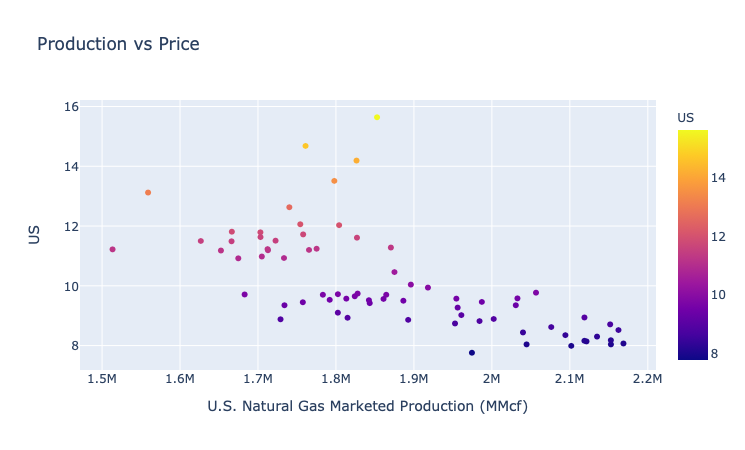

In [41]:
import plotly.express as px

px.scatter(
    combined,
    x="U.S. Natural Gas Gross Withdrawals (MMcf)",
    y="US",
)
px.scatter(combined, x="U.S. Natural Gas Marketed Production (MMcf)", y="US", color="US", title="Production vs Price")


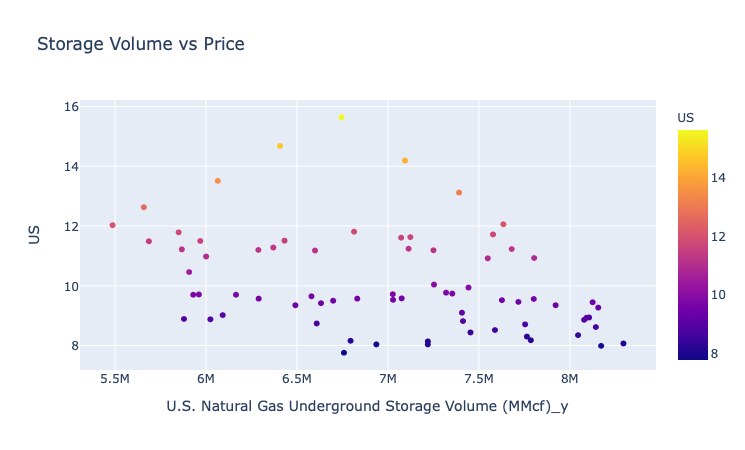

In [42]:
import plotly.express as px

px.scatter(combined, x="U.S. Natural Gas Underground Storage Volume (MMcf)_y", y="US", color="US", title="Storage Volume vs Price")



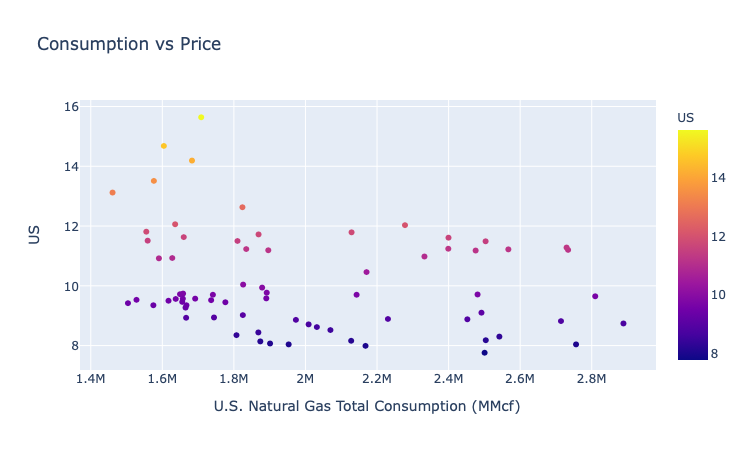

In [43]:
import plotly.express as px

px.scatter(combined, x="U.S. Natural Gas Total Consumption (MMcf)", y="US", color="US", title="Consumption vs Price")


